In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import numpy as np
import pandas as pd

In [4]:
train_dataset=pd.read_csv("C:/Users/Surendra/Desktop/Mode/mith/actual mith model/train-1574429526318.csv",na_values=['N/A','NaN','?','Na'])
# importing the data

Exploratory Data Analysis

In [5]:
train_dataset.shape # shape of the dataset

# so we have 9806 rows and 22 columns

(9806, 22)

In [6]:
train_dataset.dtypes  # type of data wrt the features

CustomerID                         int64
Customer.Lifetime.Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                     float64
dtype: object

In [7]:
# Descriptive statistics

train_dataset.describe() # description of the numerical variables

,CustomerID,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
count,9806.000000,9806.000000,9688.000000,9012.000000,9806.000000,9806.000000,8988.000000,9685.000000,9806.000000,9680.000000
mean,5778.381807,7998.047015,37511.054604,93.340657,15.143993,48.165001,0.379172,2.960351,438.266734,2.089773
std,3343.286093,6848.055899,30292.974468,34.417763,10.004327,27.963630,0.896427,2.389801,293.502301,0.538524
min,1.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2879.250000,4013.949039,0.000000,68.750000,6.000000,24.000000,0.000000,1.000000,280.352767,2.000000
50%,5783.000000,5780.182197,33767.500000,83.000000,14.000000,48.000000,0.000000,2.000000,384.007015,2.000000
75%,8678.750000,8960.280213,62018.000000,109.000000,23.000000,71.750000,0.000000,4.000000,553.540973,2.000000
max,11573.000000,83325.381190,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,3.000000


customer id is a unique column we need to drop it.

customer life time value,Total.Claim.Amount have outliers.

Income,Monthly premium auto,no of open complaints,no of polices,vehicle size has null values.

Months.Since.Last.Claim,Months.Since.Policy.Inception,	Number.of.Open.Complaints,Number.of.Policies,Vehicle.Size
 is categorical.

In [8]:
train_dataset.describe(include='O') # description of categorical varaibles

,Coverage,Education,EmploymentStatus,Gender,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
count,8881,9677,9688,9677,9806,9687,9677,8915,9685,9678,9678,9680
unique,3,5,5,2,2840,3,3,3,9,4,4,6
top,Basic,Bachelor,Employed,F,"NA,NA",Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car
freq,5361,2934,6020,4985,119,6204,5643,6620,3637,3975,3670,4869


Coverage,Education,EmploymentStatus,Gender,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class all are having null values.

Location.Geo can cause high dimensionality so better to drop it.



# Data Visualizations and Preprocessing

#### Dropping Unwanted columns

In [9]:
train_dataset.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [10]:
def drop_unwanted(x):
    x.drop(['CustomerID','Location.Geo'],axis=1,inplace=True)

In [11]:
drop_unwanted(train_dataset)

In [12]:
train_dataset.columns

Index(['Customer.Lifetime.Value', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'Location.Code', 'Marital.Status',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

#### Type Conversion

In [13]:
def type_conversion(x):
    x['Months.Since.Last.Claim']=x["Months.Since.Last.Claim"].astype("category")
    x["Months.Since.Policy.Inception"]=x["Months.Since.Policy.Inception"].astype("category")
    x["Number.of.Open.Complaints"]=x["Number.of.Open.Complaints"].astype("category")
    x["Number.of.Policies"]=x["Number.of.Policies"].astype("category")
    x["Vehicle.Size"]=x["Vehicle.Size"].astype("category")


In [14]:
type_conversion(train_dataset)

#### Let's split the data to train and test

##### as the test data is unknown to us it is better to preprocess differently the train and test data to understand the model how it is working with the test data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=train_dataset.drop(['Customer.Lifetime.Value'],axis=1)
y=train_dataset[['Customer.Lifetime.Value']]

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=4306)

##### Lets see if there are any null values or not

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

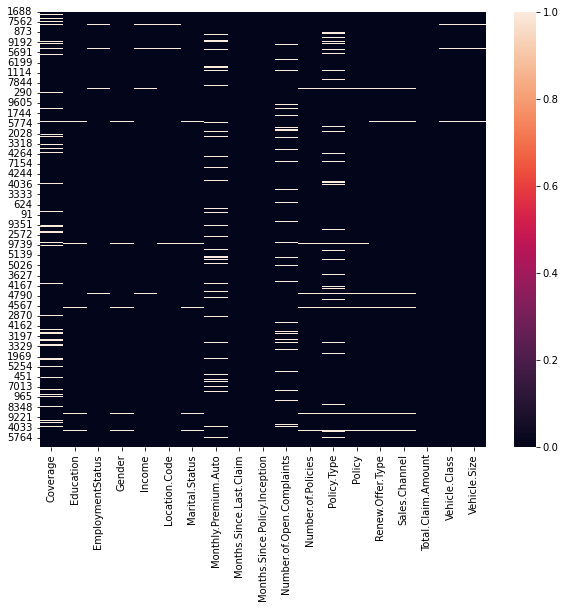

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train.isna())

#### lets fill the missing values

##### as there are outliers in our numerical data it is better to fill the missing values with median.

##### filling the missing values with the mode to the categorical data.

In [20]:
# lets fill the train data numerical columns

In [21]:
numerical_cols=x_train.describe().columns
categorical_cols=x_train.describe(include=['object','category']).columns

In [22]:
numerical_cols

Index(['Income', 'Monthly.Premium.Auto', 'Total.Claim.Amount'], dtype='object')

In [23]:
# using simple imputer

from sklearn.impute import SimpleImputer

In [24]:
si=SimpleImputer(strategy='median')
x_train[numerical_cols]=si.fit_transform(x_train[numerical_cols])

In [25]:
# lets fill the train data categorical variables

In [26]:
categorical_cols

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [27]:
sic=SimpleImputer(strategy='most_frequent')
x_train[categorical_cols]=sic.fit_transform(x_train[categorical_cols])

<AxesSubplot:>

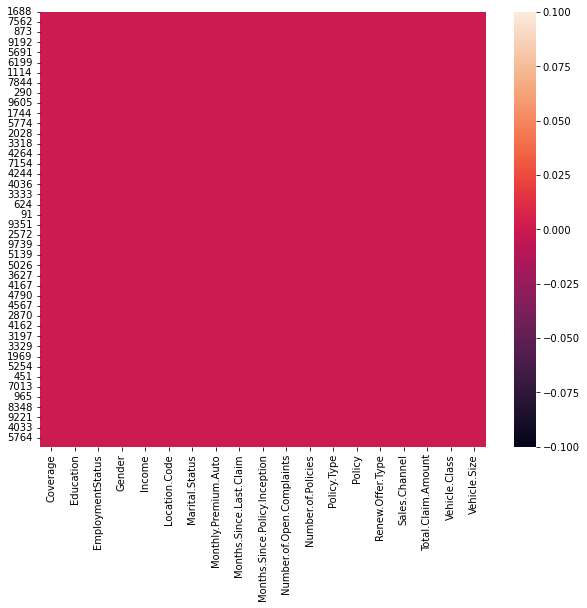

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train.isna())
# no null values

In [29]:
# lets fill the y_train data which is a numerical column

In [30]:
sii=SimpleImputer(strategy='median')
y_train[['Customer.Lifetime.Value']]=sii.fit_transform(y_train[['Customer.Lifetime.Value']])

In [31]:
y_train[['Customer.Lifetime.Value']].isna().sum()

Customer.Lifetime.Value    0
dtype: int64

#### Lets see if there are outliers or not using boxplot

In [32]:
numerical_cols

Index(['Income', 'Monthly.Premium.Auto', 'Total.Claim.Amount'], dtype='object')

In [33]:
# outliers can only be seen in numerical colums

In [34]:
def whiskers(x):
    IQR1=np.quantile(x,0.75)-np.quantile(x,0.25)
    print("IQR :",IQR1)
    upper_whishker=(np.quantile(x,0.75)+(1.5)*IQR1)
    print("upper_whishker:",upper_whishker)
    lower_whishker=(np.quantile(x,0.25)-(1.5)*IQR1)
    print("lower_whishker :",lower_whishker)
    print("total number of data points above upper whishker :",(x>upper_whishker).sum())
    print("total number of data points below the lower whishker ",(x<lower_whishker).sum())

<AxesSubplot:xlabel='Income'>

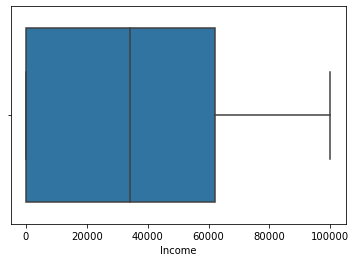

In [35]:
sns.boxplot(x_train['Income'])
# have outlers or influential point

In [36]:
whiskers(x_train['Income'])

IQR : 61994.0
upper_whishker: 154985.0
lower_whishker : -92991.0
total number of data points above upper whishker : 0
total number of data points below the lower whishker  0


<AxesSubplot:xlabel='Monthly.Premium.Auto'>

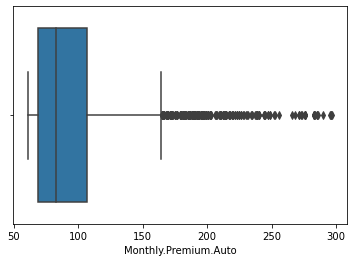

In [37]:
sns.boxplot(x_train['Monthly.Premium.Auto'])
# don't have any outlers or influential point

In [38]:
whiskers(x_train['Monthly.Premium.Auto'])

IQR : 38.0
upper_whishker: 164.0
lower_whishker : 12.0
total number of data points above upper whishker : 326
total number of data points below the lower whishker  0


<AxesSubplot:xlabel='Total.Claim.Amount'>

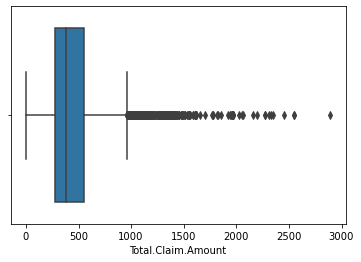

In [39]:
sns.boxplot(x_train['Total.Claim.Amount'])
# have any outliers or influential point

In [40]:
whiskers(x_train['Total.Claim.Amount'])

IQR : 270.75037575
upper_whishker: 958.125563625
lower_whishker : -124.87593937499997
total number of data points above upper whishker : 348
total number of data points below the lower whishker  0


In [41]:
# All are related to the income so may be they are not outliers.

### Standardization

##### to make our model fast during the training we need to do standardization

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()
x_train[numerical_cols]=scaler.fit_transform(x_train[numerical_cols])

In [44]:
x_train[numerical_cols].head()

,Income,Monthly.Premium.Auto,Total.Claim.Amount
1688,-1.247703,-0.284805,-0.133205
5495,0.414690,1.158925,0.651813
550,-0.173605,6.151825,4.539874
7732,1.940515,0.737837,0.396261
6304,0.393430,0.677682,0.391128


In [45]:
scaler_y=StandardScaler()
y_train[['Customer.Lifetime.Value']]=scaler_y.fit_transform(y_train[['Customer.Lifetime.Value']])

In [46]:
# y_train[['Customer.Lifetime.Value']] = scaler_y.inverse_transform(y_train[['Customer.Lifetime.Value']])

# to detransform it we can use this code

#### Dummification

##### as our system can't process the cateorical variables we have to convert them into numericals

##### the process of converting the categorical variables are called dummification

In [47]:
# dummification can be done for categorical variables
# categorical variables are three types

# nominal - variables having data points which don't have any order (no of childern in a family - 2,1,5)
# ordinal - variables having data points which have a specific order (rating - 5,4,3,2,1)

# nominal can be handle using OneHotEncoder 
# ordinal can be handle using  ordinal encoder
# if our target is categorical then we have to use label encoder.

# or  we can also do one hot encoder for every categorical varible.
# if we had very few categories in a feature we can go with one hot encoder. (becasue this doesnot causes the curse of dimensionality )
# if we had very high categories in a feature we can go with their respective method.

In [48]:
categorical_cols

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [49]:
x_train[categorical_cols].describe()

,Coverage,Education,EmploymentStatus,Gender,Location.Code,Marital.Status,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class,Vehicle.Size
count,6864,6864,6864,6864,6864,6864,6864,6864,6864.0,6864.0,6864,6864,6864,6864,6864,6864.0
unique,3,5,5,2,3,3,36,100,6.0,9.0,3,9,4,4,6,3.0
top,Basic,Bachelor,Employed,F,Suburban,Married,3,61,0.0,1.0,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,2.0
freq,4380,2176,4304,3538,4430,4059,281,111,5564.0,2494.0,5256,2649,2862,2662,3487,4814.0


In [50]:
onehot_cols=['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class','Vehicle.Size']
ordinal_cols=['Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies']

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
oe=OneHotEncoder(handle_unknown='ignore',drop='if_binary')
one_hot_data=pd.DataFrame(oe.fit_transform(x_train[['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class','Vehicle.Size']]).toarray(),columns=oe.get_feature_names())

In [53]:
one_hot_data.columns

Index(['x0_Basic', 'x0_Extended', 'x0_Premium', 'x1_Bachelor', 'x1_College',
       'x1_Doctor', 'x1_High School or Below', 'x1_Master', 'x2_Disabled',
       'x2_Employed', 'x2_Medical Leave', 'x2_Retired', 'x2_Unemployed',
       'x3_M', 'x4_Rural', 'x4_Suburban', 'x4_Urban', 'x5_Divorced',
       'x5_Married', 'x5_Single', 'x6_Corporate Auto', 'x6_Personal Auto',
       'x6_Special Auto', 'x7_Corporate L1', 'x7_Corporate L2',
       'x7_Corporate L3', 'x7_Personal L1', 'x7_Personal L2', 'x7_Personal L3',
       'x7_Special L1', 'x7_Special L2', 'x7_Special L3', 'x8_Offer1',
       'x8_Offer2', 'x8_Offer3', 'x8_Offer4', 'x9_Agent', 'x9_Branch',
       'x9_Call Center', 'x9_Web', 'x10_Four-Door Car', 'x10_Luxury Car',
       'x10_Luxury SUV', 'x10_SUV', 'x10_Sports Car', 'x10_Two-Door Car',
       'x11_1.0', 'x11_2.0', 'x11_3.0'],
      dtype='object')

In [54]:
# lets do ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

In [55]:
x_train[ordinal_cols].head()

,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies
1688,20,32,0.0,1.0
5495,0,37,0.0,1.0
550,24,68,0.0,1.0
7732,33,81,0.0,6.0
6304,1,73,0.0,1.0


In [56]:
ordinal=OrdinalEncoder()
x_train[ordinal_cols]=ordinal.fit_transform(x_train[ordinal_cols])

In [57]:
x_train.shape

(6864, 19)

In [58]:
x_train.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
1688,Extended,Master,Unemployed,F,-1.247703,Suburban,Married,-0.284805,20.0,32.0,0.0,0.0,Personal Auto,Personal L1,Offer2,Call Center,-0.133205,Four-Door Car,2.0
5495,Extended,High School or Below,Employed,M,0.414690,Suburban,Married,1.158925,0.0,37.0,0.0,0.0,Personal Auto,Personal L2,Offer1,Branch,0.651813,SUV,2.0
550,Premium,College,Employed,M,-0.173605,Suburban,Married,6.151825,24.0,68.0,0.0,0.0,Personal Auto,Personal L1,Offer1,Agent,4.539874,Luxury Car,2.0
7732,Premium,High School or Below,Employed,F,1.940515,Urban,Married,0.737837,33.0,81.0,0.0,5.0,Personal Auto,Personal L1,Offer1,Call Center,0.396261,Four-Door Car,2.0
6304,Basic,High School or Below,Employed,F,0.393430,Suburban,Divorced,0.677682,1.0,73.0,0.0,0.0,Personal Auto,Personal L2,Offer3,Web,0.391128,SUV,1.0


In [59]:
one_hot_data.shape

(6864, 49)

In [60]:
one_hot_data.head()

,x0_Basic,x0_Extended,x0_Premium,x1_Bachelor,x1_College,x1_Doctor,x1_High School or Below,x1_Master,x2_Disabled,x2_Employed,...,x9_Web,x10_Four-Door Car,x10_Luxury Car,x10_Luxury SUV,x10_SUV,x10_Sports Car,x10_Two-Door Car,x11_1.0,x11_2.0,x11_3.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [61]:
one_hot_data.set_index(x_train.index,inplace=True)

In [62]:
# lets concat the train data with one hot dummified data

x_train_dummified=pd.concat([x_train,one_hot_data],axis=1)

In [63]:
x_train_dummified.shape

(6864, 68)

In [64]:
pd.set_option("display.max_columns",None)

In [65]:
x_train_dummified.head()

,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size,x0_Basic,x0_Extended,x0_Premium,x1_Bachelor,x1_College,x1_Doctor,x1_High School or Below,x1_Master,x2_Disabled,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,x4_Rural,x4_Suburban,x4_Urban,x5_Divorced,x5_Married,x5_Single,x6_Corporate Auto,x6_Personal Auto,x6_Special Auto,x7_Corporate L1,x7_Corporate L2,x7_Corporate L3,x7_Personal L1,x7_Personal L2,x7_Personal L3,x7_Special L1,x7_Special L2,x7_Special L3,x8_Offer1,x8_Offer2,x8_Offer3,x8_Offer4,x9_Agent,x9_Branch,x9_Call Center,x9_Web,x10_Four-Door Car,x10_Luxury Car,x10_Luxury SUV,x10_SUV,x10_Sports Car,x10_Two-Door Car,x11_1.0,x11_2.0,x11_3.0
1688,Extended,Master,Unemployed,F,-1.247703,Suburban,Married,-0.284805,20.0,32.0,0.0,0.0,Personal Auto,Personal L1,Offer2,Call Center,-0.133205,Four-Door Car,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5495,Extended,High School or Below,Employed,M,0.414690,Suburban,Married,1.158925,0.0,37.0,0.0,0.0,Personal Auto,Personal L2,Offer1,Branch,0.651813,SUV,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
550,Premium,College,Employed,M,-0.173605,Suburban,Married,6.151825,24.0,68.0,0.0,0.0,Personal Auto,Personal L1,Offer1,Agent,4.539874,Luxury Car,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7732,Premium,High School or Below,Employed,F,1.940515,Urban,Married,0.737837,33.0,81.0,0.0,5.0,Personal Auto,Personal L1,Offer1,Call Center,0.396261,Four-Door Car,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6304,Basic,High School or Below,Employed,F,0.393430,Suburban,Divorced,0.677682,1.0,73.0,0.0,0.0,Personal Auto,Personal L2,Offer3,Web,0.391128,SUV,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [66]:
# drop the dummified columns

x_train_dummified.drop(['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class','Vehicle.Size'],axis=1,inplace=True)

In [67]:
# we have to preprocess the test data also

In [68]:
x_test.columns

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Income',
       'Location.Code', 'Marital.Status', 'Monthly.Premium.Auto',
       'Months.Since.Last.Claim', 'Months.Since.Policy.Inception',
       'Number.of.Open.Complaints', 'Number.of.Policies', 'Policy.Type',
       'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Total.Claim.Amount',
       'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [69]:
type_conversion(x_test)

In [70]:
x_test[numerical_cols]=si.transform(x_test[numerical_cols])

In [71]:
y_test[['Customer.Lifetime.Value']]=sii.transform(y_test[['Customer.Lifetime.Value']])

In [72]:
x_test[categorical_cols]=sic.transform(x_test[categorical_cols])

In [73]:
x_test[numerical_cols]=scaler.transform(x_test[numerical_cols])

In [74]:
y_test[['Customer.Lifetime.Value']]=scaler_y.transform(y_test[['Customer.Lifetime.Value']])

In [75]:
oe_test_data=pd.DataFrame(oe.transform(x_test[['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class','Vehicle.Size']]).toarray(),columns=oe.get_feature_names())

In [76]:
oe_test_data.set_index(x_test.index,inplace=True)

In [77]:
x_test[ordinal_cols]=ordinal.transform(x_test[ordinal_cols])

In [78]:
x_test_dummified=pd.concat([x_test,oe_test_data],axis=1)

In [79]:
x_test_dummified.drop(['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class','Vehicle.Size'],axis=1,inplace=True)

In [80]:
# end of data preprocessing

end of data preprocessing

In [81]:
# lets start model building with out data x_train_dummified,y_train

In [82]:
# Linear regression

from sklearn.linear_model import LinearRegression

In [83]:
lr=LinearRegression()
lr.fit(x_train_dummified,y_train)

LinearRegression()

In [84]:
test_preds_lr=lr.predict(x_test_dummified)

In [85]:
from sklearn.metrics import r2_score,mean_squared_error

In [86]:
print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_lr))

0.148472877871617


In [87]:
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_lr))

0.8202997664846421


In [88]:
# lasso
from sklearn.linear_model import Lasso

In [89]:
la=Lasso()
la.fit(x_train_dummified,y_train)
test_preds_la=la.predict(x_test_dummified)
print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_la))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_la))

-4.576938183786794e-05
0.963371911216934


In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
paramas_lasso={'alpha':[0.001,0.5,1,2,5,10,20],'max_iter':[100,200,300,400]}

model_lasso=Lasso()
model_grid_lasso=GridSearchCV(estimator=model_lasso,param_grid=paramas_lasso,scoring='r2',cv=5)

model_grid_lasso.fit(x_train_dummified,y_train)
print(model_grid_lasso.best_params_)

print(model_grid_lasso.best_score_)

test_preds_lasso_gs=model_grid_lasso.predict(x_test_dummified)

print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_lasso_gs))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_lasso_gs))

{'alpha': 0.001, 'max_iter': 100}
0.1612835405172192
0.15144253630282678
0.8174390119010749


In [92]:
# Ridge

from sklearn.linear_model import Ridge

ri=Ridge()
ri.fit(x_train_dummified,y_train)
test_preds_ri=ri.predict(x_test_dummified)
print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_ri))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_ri,squared=True))

0.14855452782165657
0.820221110816243


In [93]:
paramas_ridge={'alpha':[0.001,0.5,1,2,5,10,20],'max_iter':[100,200,300,400]}

model_ridge=Ridge()
model_grid_ridge=GridSearchCV(estimator=model_ridge,param_grid=paramas_ridge,scoring='r2',cv=5)

model_grid_ridge.fit(x_train_dummified,y_train)
print(model_grid_ridge.best_params_)

print(model_grid_ridge.best_score_)

test_preds_ridge_gs=model_grid_ridge.predict(x_test_dummified)

print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_ridge_gs))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_ridge_gs))

{'alpha': 20, 'max_iter': 100}
0.1600731667715601
0.14938170375606652
0.8194242692263448


In [94]:
# kneareast neighbours

In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [96]:
KNN=KNeighborsRegressor()
KNN.fit(x_train_dummified,y_train)
test_preds_KNN=KNN.predict(x_test_dummified)
print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_KNN))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_KNN,squared=True))

0.09310998888264266
0.873632377659796


In [97]:
paramas_KNN={'n_neighbors':[2,4,5,6,7,8,9,10],"weights" : ['uniform', 'distance'],"algorithm":['auto','kd_tree'] }

model_KNN=KNeighborsRegressor()
model_grid_KNN=GridSearchCV(estimator=model_KNN,param_grid=paramas_KNN,scoring='r2',cv=5)

model_grid_KNN.fit(x_train_dummified,y_train)
print(model_grid_KNN.best_params_)

print(model_grid_KNN.best_score_)

test_preds_KNN_gs=model_grid_KNN.predict(x_test_dummified)

print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_KNN_gs))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_KNN_gs))

{'algorithm': 'kd_tree', 'n_neighbors': 10, 'weights': 'distance'}
0.11206348999436164
0.14483995140731043
0.8237994656168058


In [98]:
# Decision trees

from sklearn.tree import DecisionTreeRegressor

In [99]:
paramas_dtr={'criterion':["squared_error","absolute_error","poisson"],"splitter":["best", "random"],"max_depth":[3,4,5,6,10]}

model_dtr=DecisionTreeRegressor()
model_grid_dtr=GridSearchCV(estimator=model_dtr,param_grid=paramas_dtr,scoring='r2',cv=5)

model_grid_dtr.fit(x_train_dummified,y_train)
print(model_grid_dtr.best_params_)

print(model_grid_dtr.best_score_)

test_preds_dtr_gs=model_grid_dtr.predict(x_test_dummified)

print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_dtr_gs))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_dtr_gs))

{'criterion': 'squared_error', 'max_depth': 4, 'splitter': 'best'}
0.6269489175361718
0.6278360336921998
0.35851590245678566


In [100]:

from sklearn.ensemble import RandomForestRegressor

In [101]:
model_rfr=RandomForestRegressor()
model_rfr.fit(x_train_dummified,y_train)
test_preds_rfr=model_rfr.predict(x_test_dummified)

print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_rfr))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_rfr))

0.673936413036229
0.3141061245083868


In [102]:
y_test[['Customer.Lifetime.Value']][0:5]

,Customer.Lifetime.Value
3920,2.037582
7244,-0.337636
4911,1.198116
1258,-0.452990
2923,-0.802178


In [103]:
test_preds_rfr[0:5]

array([ 0.81111351, -0.32437235,  2.03218684, -0.4650738 , -0.75996105])

In [104]:
# paramas_rfr={"n_estimators":[100,200,300],'criterion':["squared_error","absolute_error","poisson"],"max_depth":[3,4,5,6,10]}

# model_rfr=RandomForestRegressor()
# model_grid_rfr=GridSearchCV(estimator=model_rfr,param_grid=paramas_rfr,scoring='r2',cv=5)

# model_grid_rfr.fit(x_train_dummified,y_train)
# print(model_grid_rfr.best_params_)

# print(model_grid_rfr.best_score_)

# test_preds_rfr_gs=model_grid_rfr.predict(x_test_dummified)

# print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_rfr_gs))
# print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_rfr_gs))

In [105]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [106]:
model_ann = Sequential()
model_ann.add(Dense(1))
model_ann.compile(optimizer='rmsprop',loss= keras.losses.MeanSquaredError())

In [107]:
model_ann.fit(x_train_dummified,y_train,epochs=100)

Epoch 1/100
215/215 [==============================] - 1s 5ms/step - loss: 4.4776
Epoch 2/100
215/215 [==============================] - 1s 4ms/step - loss: 1.0326
Epoch 3/100
215/215 [==============================] - 1s 3ms/step - loss: 0.8951
Epoch 4/100
215/215 [==============================] - 1s 3ms/step - loss: 0.8652
Epoch 5/100
215/215 [==============================] - 0s 2ms/step - loss: 0.8524
Epoch 6/100
215/215 [==============================] - 0s 2ms/step - loss: 0.8515
Epoch 7/100
215/215 [==============================] - 0s 2ms/step - loss: 0.8483
Epoch 8/100
215/215 [==============================] - 0s 1ms/step - loss: 0.8472
Epoch 9/100
215/215 [==============================] - 0s 2ms/step - loss: 0.8432
Epoch 10/100
215/215 [==============================] - 0s 2ms/step - loss: 0.8449
Epoch 11/100
215/215 [==============================] - 0s 2ms/step - loss: 0.8451
Epoch 12/100
215/215 [==============================] - 0s 2ms/step - loss: 0.8442
Epoch 13/100


215/215 [==============================] - 0s 1ms/step - loss: 0.8399
Epoch 100/100
215/215 [==============================] - 0s 1ms/step - loss: 0.8407


In [108]:
test_preds_ann1=model_ann.predict(x_test_dummified)

print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_ann1))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_ann1))

92/92 [==============================] - 0s 4ms/step
0.13757124021508593
0.8308016173259878


In [109]:
model_ann2 = Sequential()
model_ann2.add(Dense(10,activation='linear'))
model_ann2.add(Dense(20,activation='linear'))
model_ann2.add(Dense(1,activation='linear'))
model_ann2.compile(optimizer='rmsprop',loss= keras.losses.MeanSquaredError())

In [110]:
model_ann2.fit(x_train_dummified,y_train,epochs=500)

Epoch 1/500
215/215 [==============================] - 1s 3ms/step - loss: 9.1147
Epoch 2/500
215/215 [==============================] - 1s 4ms/step - loss: 1.0505
Epoch 3/500
215/215 [==============================] - 1s 3ms/step - loss: 1.0092
Epoch 4/500
215/215 [==============================] - 0s 2ms/step - loss: 0.9953
Epoch 5/500
215/215 [==============================] - 0s 2ms/step - loss: 0.9733
Epoch 6/500
215/215 [==============================] - 0s 2ms/step - loss: 0.9497
Epoch 7/500
215/215 [==============================] - 0s 2ms/step - loss: 0.9440
Epoch 8/500
215/215 [==============================] - 1s 3ms/step - loss: 0.9500
Epoch 9/500
215/215 [==============================] - 0s 2ms/step - loss: 0.9326
Epoch 10/500
215/215 [==============================] - 0s 2ms/step - loss: 0.9225
Epoch 11/500
215/215 [==============================] - 0s 2ms/step - loss: 0.9174
Epoch 12/500
215/215 [==============================] - 0s 2ms/step - loss: 0.9176
Epoch 13/500


215/215 [==============================] - 1s 3ms/step - loss: 0.8376
Epoch 100/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8373
Epoch 101/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8378
Epoch 102/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8374
Epoch 103/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8387
Epoch 104/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8376
Epoch 105/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8386
Epoch 106/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8379
Epoch 107/500
215/215 [==============================] - 1s 2ms/step - loss: 0.8363
Epoch 108/500
215/215 [==============================] - 1s 4ms/step - loss: 0.8362
Epoch 109/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8376
Epoch 110/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8373
Epoch 

215/215 [==============================] - 1s 4ms/step - loss: 0.8356
Epoch 197/500
215/215 [==============================] - 1s 4ms/step - loss: 0.8347
Epoch 198/500
215/215 [==============================] - 1s 4ms/step - loss: 0.8364
Epoch 199/500
215/215 [==============================] - 1s 4ms/step - loss: 0.8357
Epoch 200/500
215/215 [==============================] - 1s 5ms/step - loss: 0.8360
Epoch 201/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8353
Epoch 202/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8353
Epoch 203/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8357
Epoch 204/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8351
Epoch 205/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8353
Epoch 206/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8351
Epoch 207/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8367
Epoch 

215/215 [==============================] - 0s 1ms/step - loss: 0.8351
Epoch 294/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8346
Epoch 295/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8338
Epoch 296/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8351
Epoch 297/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8348
Epoch 298/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8348
Epoch 299/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8336
Epoch 300/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8343
Epoch 301/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8335
Epoch 302/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8353
Epoch 303/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8340
Epoch 304/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8343
Epoch 

215/215 [==============================] - 1s 3ms/step - loss: 0.8341
Epoch 391/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8335
Epoch 392/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8337
Epoch 393/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8341
Epoch 394/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8337
Epoch 395/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8331
Epoch 396/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8336
Epoch 397/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8338
Epoch 398/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8341
Epoch 399/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8332
Epoch 400/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8334
Epoch 401/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8330
Epoch 

215/215 [==============================] - 0s 1ms/step - loss: 0.8324
Epoch 488/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8345
Epoch 489/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8334
Epoch 490/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8336
Epoch 491/500
215/215 [==============================] - 1s 5ms/step - loss: 0.8334
Epoch 492/500
215/215 [==============================] - 1s 5ms/step - loss: 0.8329
Epoch 493/500
215/215 [==============================] - 1s 3ms/step - loss: 0.8324
Epoch 494/500
215/215 [==============================] - 0s 1ms/step - loss: 0.8338
Epoch 495/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8335
Epoch 496/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8334
Epoch 497/500
215/215 [==============================] - 0s 2ms/step - loss: 0.8336
Epoch 498/500
215/215 [==============================] - 1s 2ms/step - loss: 0.8332
Epoch 

In [111]:
test_preds_ann2=model_ann2.predict(x_test_dummified)

print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_ann2))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_ann2))

92/92 [==============================] - 0s 2ms/step
0.1488224773190988
0.819962987610922


In [112]:
y_test[['Customer.Lifetime.Value']][0:5]

,Customer.Lifetime.Value
3920,2.037582
7244,-0.337636
4911,1.198116
1258,-0.452990
2923,-0.802178


In [113]:
test_preds_ann2[0:5]

array([[-0.3687855 ],
       [-0.1646918 ],
       [ 0.47172916],
       [-0.35257542],
       [-0.6810199 ]], dtype=float32)

<AxesSubplot:>

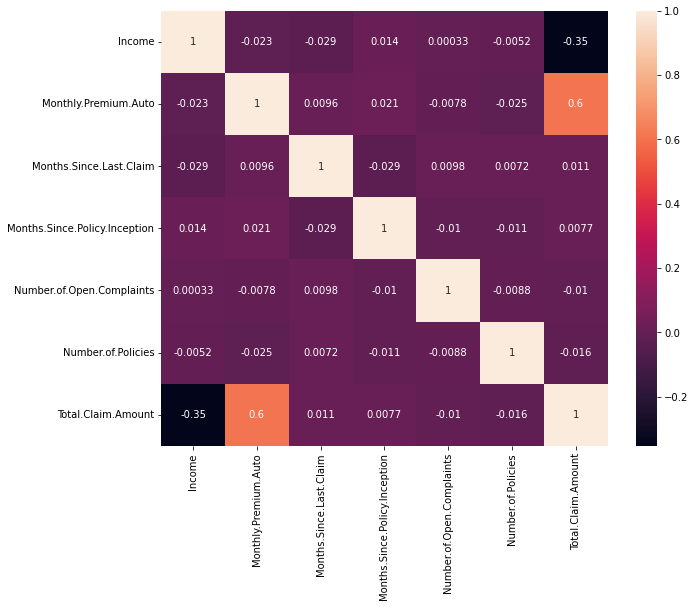

In [114]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train.corr(),annot=True)

In [115]:
# seems there is no correlation between the independnet variables and dependent variable.

In [116]:
# lets do PCA on this data and see the results

In [117]:
from sklearn.decomposition import PCA
pc = PCA()

In [118]:
pc.fit(x_train_dummified)

PCA()

In [119]:
print("Eigen values:",pc.explained_variance_)
print("Eigen vectors:",pc.components_)

Eigen values: [7.89678553e+02 9.98185531e+01 5.68564213e+00 2.03314853e+00
 1.26828614e+00 7.41994939e-01 4.79626499e-01 4.57798900e-01
 3.87796334e-01 3.71776354e-01 3.40083587e-01 3.28426666e-01
 3.07570991e-01 3.00131426e-01 2.88645500e-01 2.79188957e-01
 2.79064452e-01 2.42827768e-01 2.15036962e-01 1.99126248e-01
 1.92641185e-01 1.75401825e-01 1.60075920e-01 1.53075172e-01
 1.51586137e-01 1.26324520e-01 1.17517499e-01 1.00315681e-01
 9.58238884e-02 9.42098077e-02 8.69663369e-02 8.40568041e-02
 7.86863646e-02 7.04257028e-02 5.56797077e-02 4.70879095e-02
 4.57703781e-02 4.28103609e-02 3.05585471e-02 1.86909460e-02
 1.72284895e-02 9.28261369e-03 7.17558364e-03 7.01693631e-03
 1.19983780e-03 1.55736634e-28 5.56097667e-30 5.56097667e-30
 5.56097667e-30 5.56097667e-30 5.56097667e-30 5.56097667e-30
 5.56097667e-30 5.56097667e-30 5.56097667e-30 5.56097667e-30]
Eigen vectors: [[ 5.18265927e-04  7.63589957e-04 -1.16354172e-02 ...  2.09383373e-04
  -3.54870086e-04  1.45486713e-04]
 [-2.917404

In [120]:
np.cumsum(pc.explained_variance_ratio_)

array([0.87192469, 0.98213949, 0.9884173 , 0.9906622 , 0.99206258,
       0.99288186, 0.99341144, 0.99391692, 0.9943451 , 0.9947556 ,
       0.9951311 , 0.99549374, 0.99583334, 0.99616473, 0.99648344,
       0.99679171, 0.99709984, 0.99736796, 0.99760539, 0.99782525,
       0.99803796, 0.99823163, 0.99840838, 0.9985774 , 0.99874477,
       0.99888425, 0.99901401, 0.99912477, 0.99923058, 0.9993346 ,
       0.99943062, 0.99952343, 0.99961032, 0.99968808, 0.99974955,
       0.99980155, 0.99985208, 0.99989935, 0.99993309, 0.99995373,
       0.99997276, 0.999983  , 0.99999093, 0.99999868, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

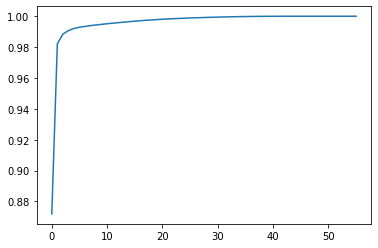

In [121]:
# visualizing the cumulative frequency
import numpy as np
from matplotlib import pyplot as plt
plt.plot(np.cumsum(pc.explained_variance_ratio_))

In [122]:
# here we select the no of components as 2 (we have to mention it on pca())
pc1 = PCA(n_components=2)

# if we didn't give the number of columns then it will take all the  columns (then there is no using all this)

# the we have to fit and trasnform the data columns 
# (transorming the data of other columns into the columns using linearequations generated by the pca)
train_pca= pc1.fit(x_train_dummified).transform(x_train_dummified) 


In [123]:
test_pca= pc1.transform(x_test_dummified)

In [124]:
model_rfr2=RandomForestRegressor()
model_rfr2.fit(train_pca,y_train)
test_preds_rfr2=model_rfr2.predict(test_pca)

print(r2_score(y_test[['Customer.Lifetime.Value']],test_preds_rfr2))
print(mean_squared_error(y_test[['Customer.Lifetime.Value']],test_preds_rfr2))


-0.2042123729659313
1.1600512804252632


In [125]:
y_test[['Customer.Lifetime.Value']][0:5]

,Customer.Lifetime.Value
3920,2.037582
7244,-0.337636
4911,1.198116
1258,-0.452990
2923,-0.802178


In [126]:
test_preds_rfr2[0:5]

array([ 0.07575054, -0.54614659, -0.43068221,  0.80764468,  2.19927972])

### predicting for the test dataset

In [127]:
test_dataset=pd.read_csv("C:/Users/Surendra/Desktop/Mode/mith/actual mith model/test-1574429501088.csv")

In [128]:
drop_unwanted(test_dataset)

In [129]:
type_conversion(test_dataset)
test_dataset[numerical_cols]=si.transform(test_dataset[numerical_cols])
# y_test[['Customer.Lifetime.Value']]=sii.transform(y_test[['Customer.Lifetime.Value']])
test_dataset[categorical_cols]=sic.transform(test_dataset[categorical_cols])

test_dataset[numerical_cols]=scaler.transform(test_dataset[numerical_cols])

# y_test[['Customer.Lifetime.Value']]=scaler_y.transform(y_test[['Customer.Lifetime.Value']])

oe_test_dataset=pd.DataFrame(oe.transform(test_dataset[['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class','Vehicle.Size']]).toarray(),columns=oe.get_feature_names())

oe_test_dataset.set_index(test_dataset.index,inplace=True)

test_dataset[ordinal_cols]=ordinal.transform(test_dataset[ordinal_cols])
x_test_dataset_dummified=pd.concat([test_dataset,oe_test_dataset],axis=1)
x_test_dataset_dummified.drop(['Coverage','Education','EmploymentStatus','Gender','Location.Code','Marital.Status','Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class','Vehicle.Size'],axis=1,inplace=True)

In [130]:
test_preds_rfr_test_dataset=model_rfr.predict(x_test_dataset_dummified)

In [131]:
# here are our results for our test datset using random forest regressor

# with 0.3141061245083868 root mean squared error.